In [1]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
# show plots inline
%matplotlib inline

* Pandas for reading and writing spreadsheets
* Numpy for carrying out efficient computations
* Matplotlib for visualization of data

###### Load the iris data:

In [2]:
col_names = ["Sepal_Length",  "Sepal_Width", "Petal_Length","Petal_Width", "Class"]
iris = pd.read_csv('iris.data', names = col_names)
iris.sample(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
15,5.7,4.4,1.5,0.4,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica


* Select rows and columns by number in the order that they appear in the data frame

In [3]:
y = iris.iloc[:,-1]
data=iris.iloc[:,:-1].values


* Check for NULL values in a data frame

In [4]:
iris.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

* Label Encoding - for encoding categorical features into numerical ones
* Encode target labels with value between 0 and n_classes-1
* fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data

In [5]:
encoder = LabelEncoder()
iris['Class'] = encoder.fit_transform(iris['Class'])
print(iris)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


## Visualize Data

In [6]:
# see how many samples we have of each Class 
iris["Class"].value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

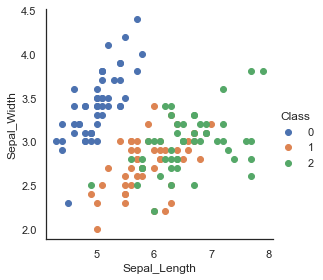

In [7]:
# use seaborn to make scatter plot showing class for each sample
sns.FacetGrid(iris, hue="Class", size=4) \
   .map(plt.scatter, "Sepal_Length", "Sepal_Width") \
   .add_legend();

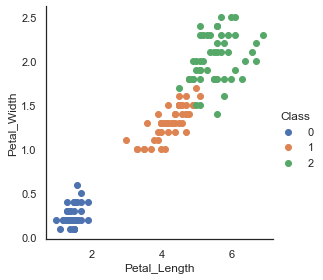

In [8]:
# do same for petals
sns.FacetGrid(iris, hue="Class", size=4) \
   .map(plt.scatter, "Petal_Length", "Petal_Width") \
   .add_legend();

In [9]:
k=len(np.unique(y)) #Select the number k to decide the number of clusters
max_iteration = 2
data.shape

(150, 4)

## K-Means Model

##### Euclidean distance

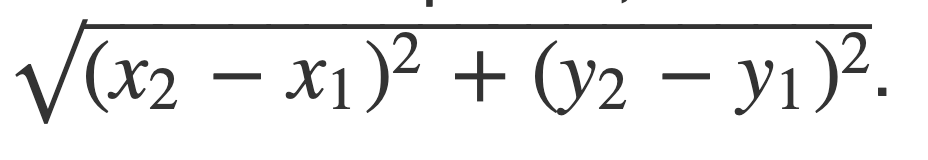

In [10]:
def Distance2Point(point1, point2):
    dis = sum((point1 - point2)**2)**0.5
    return dis

In [11]:
def KMean(data):
    
        centroids = {}
        #Assigns "k" data points of the image to the centroid
        for i in range(k): 
            centroids[i] = data[i] #Assign each data point to their closest centroid
        
        for iteration in range(max_iteration): 
            classes = {}
            
        #"k" Classes are initialising with classKey as indices.
        for classKey in range(k):
            classes[classKey] = []

        #Finding the distance of each data point with "k"centroids assigned before
        for dataPoint in data: 
            Distance = []
            for centroid in centroids:
                #Calculate Euclidean distance 
                dis = Distance2Point(dataPoint, centroids[centroid])
                Distance.append(dis)

            #Finding the centroid with minimum distance from the point and appended it into that centroid class.
            minDis = min(Distance)
            
            #Assign each data point to the cluster for which the centroid is the closest
            minDisIndex = Distance.index(minDis)
            classes[minDisIndex].append(dataPoint)
            
        #Old centroids are stored as dictionary ,because without the dict() any changes in the centroids leads
        #to change in old centroid also but we have to keep track of them.
        oldCentroid = dict(centroids)
        
        #New centroid is formed by taking the mean(average) of the data in each class.
        for classKey in classes:
            classData = classes[classKey]
            #For each cluster,compute the cluster centroid by taking the mean vector of the points in the cluster.
            NewCentroid = np.mean(classData, axis = 0) 
            centroids[classKey] = NewCentroid
            
        isFine = True
        
        #If New_centroid is different from old centroid ,
        #Need to update the old centroid with new one.Otherwise ,we can terminate it.
        for centroid in oldCentroid:
            oldCent = oldCentroid[centroid]
            curr = centroids[centroid]

            if np.sum((curr - oldCent)/oldCent * 100) > 0.001:
                isFine = False

            if isFine:
                break
                    
        return centroids, classes       

In [29]:
def cluster_class_count(cluster_labels, class_labels):
    for i in np.unique(cluster_labels):
        print("\nCluster" + str(i))
        cluster_points = class_labels[np.where(cluster_labels == i)]
        print("Class count", np.unique(cluster_points, return_counts=True))

* The total number of data points mixed with 3 clusters in an data array are 4

In [30]:
labels = np.unique(iris["Class"])
cluster_class_count(labels, data)


Cluster0
Class count (array([0.2, 1.4, 3.5, 5.1]), array([1, 1, 1, 1], dtype=int64))

Cluster1
Class count (array([0.2, 1.4, 3. , 4.9]), array([1, 1, 1, 1], dtype=int64))

Cluster2
Class count (array([0.2, 1.3, 3.2, 4.7]), array([1, 1, 1, 1], dtype=int64))


In [12]:
centroids, classes = KMean(data[:, :4])

### Elbow Method to calculate Optimal Number of Clusters

Distortion:  [780.824 179.122  87.31   66.908  50.37   42.762]


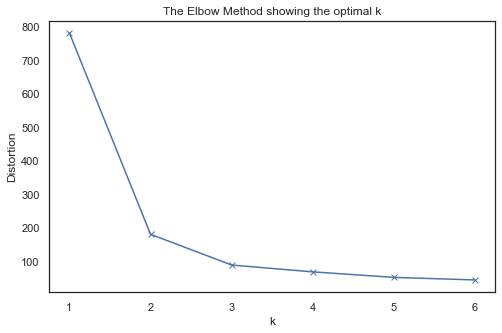

In [13]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(iris)
    #Inertia:It is a parameter which calculates the sum of distances of all the points 
    #within the cluster from the centroid of the cluster.
    distortions.append(kmeanModel.inertia_)

print("Distortion: ",np.round(distortions,3))


plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#When a graph is plotted between inertia and K values ,the value of K at which elbow forms gives the optimum.

From this graph, iptomal value for k is 3, as after that the inertia  starts decreasing rapidly 

## GMM Algorithm:

#### Initialize Clusters

* Initialise parameters $pi_k$, $mu_k$, and $cov_k$
* Here we use the results of KMeans as an initial value for $mu_k$
* set $pi_k$ to one over the number of clusters
* $cov_k$ to the identity matrix.

In [14]:
def initialize_clusters(X, n_clusters):
    clusters = []
    idx = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    mu_k = centroids
    
    for i in range(len(n_clusters)):
        #Append coefficients, mean and covarience of K-means 
        clusters.append({
            'pi_k': 1.0 / len(n_clusters),
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [15]:
clusters1 = initialize_clusters(data, classes)

#### Gaussian Distribution

* T() -Used to transpose index and columns of the data frame.
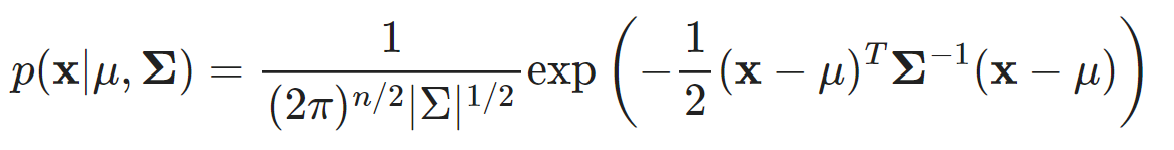

In [16]:
#Gaussian Distribution
def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

#### Expectation Step 

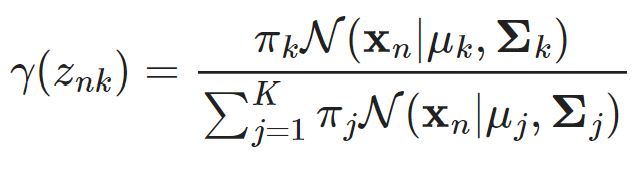

In [17]:
def expectation_step(X, clusters):
    global gamma_nk, totals
    N = X.shape[0]
    K = len(clusters)
    totals = np.zeros((N, 1), dtype=np.float64)
    gamma_nk = np.zeros((N, K), dtype=np.float64)
    
    for k, cluster in enumerate(clusters):
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        #pass X, mean and cov in gaussian distribution
        #ravel() - change 2 or multi-dimensional array into a contiguous flattened array
        gamma_nk[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()  
    
    totals = np.sum(gamma_nk, 1)
    gamma_nk /= np.expand_dims(totals, 1)

In [18]:
expectation_step(data, clusters1)

#### Maximization step

* Since $gamma(z_{nk})$ is common to the expressions for $pi_k$, $mu_k$ and $Sigma_k$

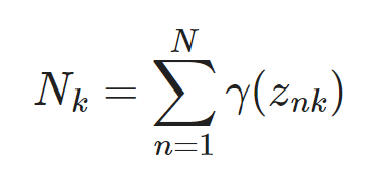

In [19]:
def maximization_step(X, clusters):
    global gamma_nk
    N = float(X.shape[0])
  
    for k, cluster in enumerate(clusters):
        gamma_k = np.expand_dims(gamma_nk[:, k], 1)
        N_k = np.sum(gamma_k, axis=0)
        
        #calculate the revised parameters
        pi_k = N_k / N
        mu_k = np.sum(gamma_k * X, axis=0) / N_k
        cov_k = (gamma_k * (X - mu_k)).T @ (X - mu_k) / N_k
        
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

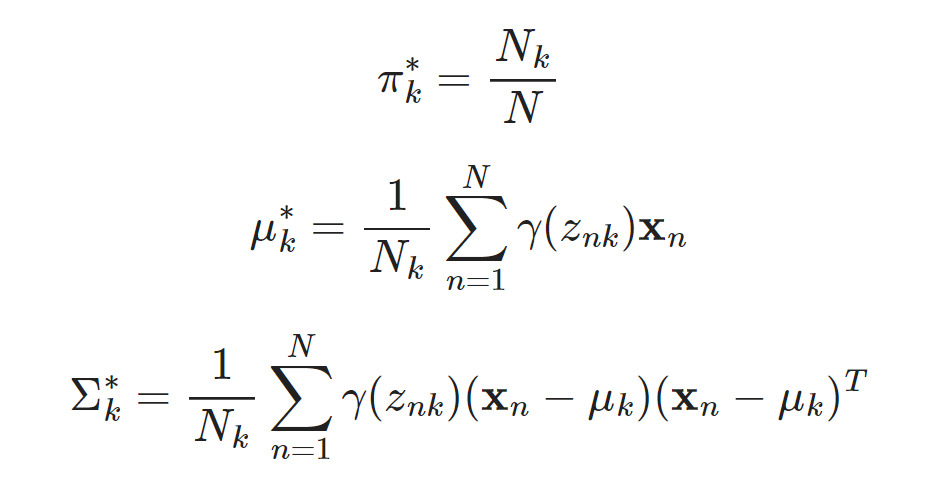

In [20]:
maximization_step(data, clusters1)

#### log-likelihood

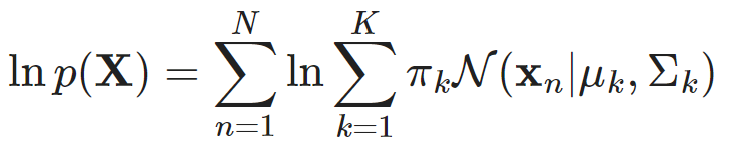

In [21]:
def get_likelihood(X, clusters):
    global gamma_nk, totals
    sample_likelihoods = np.log(totals)
    return np.sum(sample_likelihoods), sample_likelihoods

* Step 1: Initialise the parameters by using the initialise_clusters function
* Step 2: Perform several expectation-maximization steps

In [22]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters) #return cluster with coeff, mean and cov
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], len(n_clusters)))
    history = []

    for i in range(n_epochs):
        clusters_snapshot = []
        
        # This is just for our later use in the graphs
        for cluster in clusters:
            clusters_snapshot.append({
                'mu_k': cluster['mu_k'].copy(),
                'cov_k': cluster['cov_k'].copy()
            })
            
        history.append(clusters_snapshot)
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood

    scores = np.log(gamma_nk)
    
    return clusters, likelihoods, scores, sample_likelihoods, history

 * Epochs- hyperparameter, defines the number times that the learning algorithm will work through the entire training dataset

In [23]:
n_epochs = 50
clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(data, classes, n_epochs)

In [24]:
print("Mean: ")
for i in range(len(clusters)):
    print(clusters[i]['mu_k'])

Mean: 
[6.54454865 2.94866115 5.47955343 1.98460495]
[5.91496959 2.77784365 4.20155323 1.29696685]
[5.006 3.418 1.464 0.244]


In [25]:
print("Covarience: ")
for i in range(len(clusters)):
    print(clusters[i]['cov_k'])

Covarience: 
[[0.38704429 0.09220792 0.30281173 0.06165105]
 [0.09220792 0.1103377  0.08428758 0.0560115 ]
 [0.30281173 0.08428758 0.32779736 0.07453004]
 [0.06165105 0.0560115  0.07453004 0.08579773]]
[[0.27531878 0.09694138 0.18466239 0.05439074]
 [0.09694138 0.09264604 0.09114317 0.04299735]
 [0.18466239 0.09114317 0.20063041 0.06097847]
 [0.05439074 0.04299735 0.06097847 0.03199695]]
[[0.121764 0.098292 0.015816 0.010336]
 [0.098292 0.142276 0.011448 0.011208]
 [0.015816 0.011448 0.029504 0.005584]
 [0.010336 0.011208 0.005584 0.011264]]


In [26]:
print("mixing coefficients: ")
for i in range(len(clusters)):
    print(np.round(clusters[i]['pi_k'],3))

mixing coefficients: 
[0.367]
[0.299]
[0.333]


In [27]:
print("Likelihood: ")
print(likelihoods)

Likelihood: 
[-794.45043804 -233.7796751  -211.02422975 -207.44668082 -204.39278787
 -201.74539194 -199.58593427 -197.9024153  -196.0985362  -193.40347436
 -188.69178012 -183.75949235 -181.76489376 -181.18027468 -181.03736178
 -181.00623854 -180.99929218 -180.99760423 -180.99715002 -180.99701757
 -180.99697705 -180.99696435 -180.99696032 -180.99695904 -180.99695863
 -180.9969585  -180.99695846 -180.99695845 -180.99695844 -180.99695844
 -180.99695844 -180.99695844 -180.99695844 -180.99695844 -180.99695844
 -180.99695844 -180.99695844 -180.99695844 -180.99695844 -180.99695844
 -180.99695844 -180.99695844 -180.99695844 -180.99695844 -180.99695844
 -180.99695844 -180.99695844 -180.99695844 -180.99695844 -180.99695844]


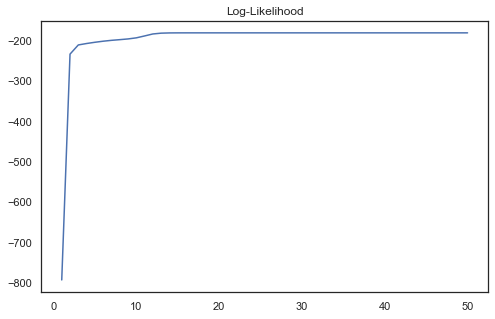

In [28]:
n_epochs=50
plt.figure(figsize=(8, 5))
plt.title('Log-Likelihood')
plt.plot(np.arange(1, n_epochs+1), likelihoods)
plt.show()